TensorFlow version: 2.12.1
Keras version: 2.12.0
Dataset dimensions: (1599, 12)
Null values in dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881


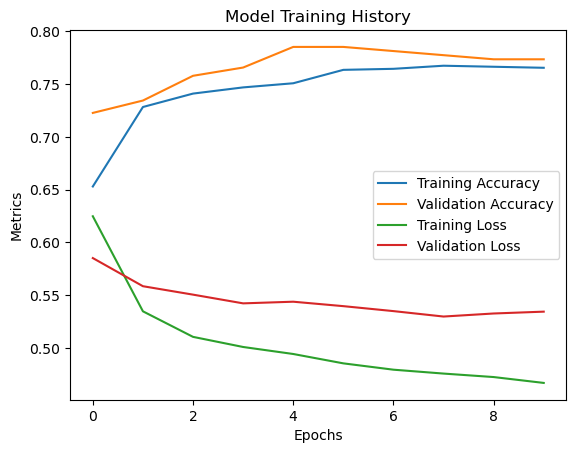

10/10 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7437
Test Loss: 0.49129900336265564
Test Accuracy: 0.7437499761581421


In [6]:
# Q1
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

# Q2
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv('wine.csv')

# Explore dataset dimensions
print("Dataset dimensions:", wine_data.shape)

# Q3
# Check for null values
print("Null values in dataset:\n", wine_data.isnull().sum())

# Q4
# Separate features and target variables
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# encode categorical variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Q5
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Q6
from sklearn.preprocessing import StandardScaler

# Perform scaling on the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Q7 and Q8
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Q9
model.summary()

# Q10 and Q11
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q12
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32)

# Q13
model_params = model.get_weights()
#print("Model parameters:", model_params)

# Q14
history_df = pd.DataFrame(history.history)

# Q15
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Q16
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
